### Install Required Packages

We would be running `Stable Diffusion 2` so enable `GPU` under `View Resources > Change runtime type`

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ca05cf25-f9af-de41-323c-cb252240cea8)


In [ ]:
%%capture
!pip install diffusers
!pip install accelerate
!pip install daam==0.0.12
!pip install git+https://github.com/RishiDarkDevil/daam-i2i.git
!pip install git+https://github.com/RishiDarkDevil/TITAN.git

In [ ]:
# !pip uninstall -y daami2i
# !pip uninstall -y daam
# !pip install git+https://github.com/RishiDarkDevil/daam-i2i.git

In [ ]:
# !git clone https://github.com/RishiDarkDevil/daam-i2i.git
# %cd daam-i2i
# !git clone https://github.com/castorini/daam.git
# %cd daam

### Import Necessary Libraries

In [ ]:
# Plotting
from matplotlib import pyplot as plt

# Data Handling
import numpy as np

# Image Processing
import cv2
from PIL import Image

# Image Generation
from diffusers import StableDiffusionPipeline

# Heatmap generation
import daam
import daami2i

# Model
import torch

# annotations
import titan

### Load Model

In [ ]:
DEVICE = 'cuda' # device

Now, let's load the `stabilityai/stable-diffusion-2-base` diffusion model.

In [ ]:
model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base')
model = model.to(DEVICE) # Set it to something else if needed, make sure DAAM supports that

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

### DAAMI2I Image Attention

In [ ]:
prompt = ['Strawberry Cake decorated with chocolate chips.']

In [ ]:
processed_prompt = titan.PromptHandler().clean_prompt(prompt)

Loading Models...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Done
Tokenizing...Done
POS Tagging and Lemmatizing...Done
Processing...Done


In [ ]:
# process the prompt for words, etc
prompt, cleaned_prompt, objects = processed_prompt[0]
processed_prompt

[('strawberry cake decorated with chocolate chips .',
  ['strawberry', 'cake', 'chocolate', 'chips'],
  ['strawberry', 'cake', 'chocolate', 'chip'])]

In [ ]:
# prints image attn slice dims
# tracing all the attentions throughout the model while generating image
with daam.trace(model) as daam_trc, daami2i.trace(model, track_all=True) as daami2i_trc:
  output_image = model(prompt).images[0]
  image_all_heat_map = daami2i_trc
  word_all_heat_map = daam_trc

  0%|          | 0/51 [00:00<?, ?it/s]

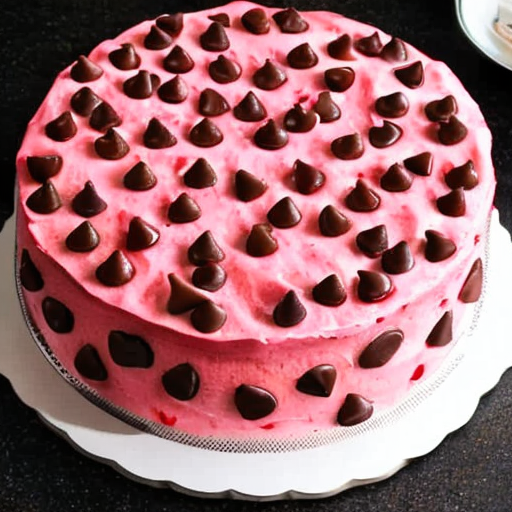

In [ ]:
output_image

In [ ]:
list(dict(list(word_all_heat_map.all_heat_maps)).keys())

[(1, 9, 0),
 (1, 9, 1),
 (1, 9, 2),
 (1, 9, 3),
 (1, 9, 4),
 (1, 10, 0),
 (1, 10, 1),
 (1, 10, 2),
 (1, 10, 3),
 (1, 10, 4),
 (2, 11, 0),
 (2, 11, 1),
 (2, 11, 2),
 (2, 11, 3),
 (2, 11, 4),
 (2, 11, 5),
 (2, 11, 6),
 (2, 11, 7),
 (2, 11, 8),
 (2, 11, 9),
 (2, 12, 0),
 (2, 12, 1),
 (2, 12, 2),
 (2, 12, 3),
 (2, 12, 4),
 (2, 12, 5),
 (2, 12, 6),
 (2, 12, 7),
 (2, 12, 8),
 (2, 12, 9),
 (4, 13, 0),
 (4, 13, 1),
 (4, 13, 2),
 (4, 13, 3),
 (4, 13, 4),
 (4, 13, 5),
 (4, 13, 6),
 (4, 13, 7),
 (4, 13, 8),
 (4, 13, 9),
 (4, 13, 10),
 (4, 13, 11),
 (4, 13, 12),
 (4, 13, 13),
 (4, 13, 14),
 (4, 13, 15),
 (4, 13, 16),
 (4, 13, 17),
 (4, 13, 18),
 (4, 13, 19),
 (4, 14, 0),
 (4, 14, 1),
 (4, 14, 2),
 (4, 14, 3),
 (4, 14, 4),
 (4, 14, 5),
 (4, 14, 6),
 (4, 14, 7),
 (4, 14, 8),
 (4, 14, 9),
 (4, 14, 10),
 (4, 14, 11),
 (4, 14, 12),
 (4, 14, 13),
 (4, 14, 14),
 (4, 14, 15),
 (4, 14, 16),
 (4, 14, 17),
 (4, 14, 18),
 (4, 14, 19),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4

In [ ]:
list(dict(list(image_all_heat_map.all_heat_maps)).keys())

[(1, 9, 0),
 (1, 9, 1),
 (1, 9, 2),
 (1, 9, 3),
 (1, 9, 4),
 (1, 9, 5),
 (1, 9, 6),
 (1, 9, 7),
 (1, 9, 8),
 (1, 9, 9),
 (1, 10, 0),
 (1, 10, 1),
 (1, 10, 2),
 (1, 10, 3),
 (1, 10, 4),
 (1, 10, 5),
 (1, 10, 6),
 (1, 10, 7),
 (1, 10, 8),
 (1, 10, 9),
 (2, 11, 0),
 (2, 11, 1),
 (2, 11, 2),
 (2, 11, 3),
 (2, 11, 4),
 (2, 11, 5),
 (2, 11, 6),
 (2, 11, 7),
 (2, 11, 8),
 (2, 11, 9),
 (2, 11, 10),
 (2, 11, 11),
 (2, 11, 12),
 (2, 11, 13),
 (2, 11, 14),
 (2, 11, 15),
 (2, 11, 16),
 (2, 11, 17),
 (2, 11, 18),
 (2, 11, 19),
 (2, 12, 0),
 (2, 12, 1),
 (2, 12, 2),
 (2, 12, 3),
 (2, 12, 4),
 (2, 12, 5),
 (2, 12, 6),
 (2, 12, 7),
 (2, 12, 8),
 (2, 12, 9),
 (2, 12, 10),
 (2, 12, 11),
 (2, 12, 12),
 (2, 12, 13),
 (2, 12, 14),
 (2, 12, 15),
 (2, 12, 16),
 (2, 12, 17),
 (2, 12, 18),
 (2, 12, 19),
 (4, 13, 0),
 (4, 13, 1),
 (4, 13, 2),
 (4, 13, 3),
 (4, 13, 4),
 (4, 13, 5),
 (4, 13, 6),
 (4, 13, 7),
 (4, 13, 8),
 (4, 13, 9),
 (4, 13, 10),
 (4, 13, 11),
 (4, 13, 12),
 (4, 13, 13),
 (4, 13, 14),
 (4, 13, 1

In [ ]:
[x for x in list(dict(list(word_all_heat_map.all_heat_maps)).keys()) if x not in list(dict(list(image_all_heat_map.all_heat_maps)).keys())]

[]

In [ ]:
# These are because I didn't filter out the unconditional blocks in case of image2image attention
[x for x in list(dict(list(image_all_heat_map.all_heat_maps)).keys()) if x not in list(dict(list(word_all_heat_map.all_heat_maps)).keys())]

[(1, 9, 5),
 (1, 9, 6),
 (1, 9, 7),
 (1, 9, 8),
 (1, 9, 9),
 (1, 10, 5),
 (1, 10, 6),
 (1, 10, 7),
 (1, 10, 8),
 (1, 10, 9),
 (2, 11, 10),
 (2, 11, 11),
 (2, 11, 12),
 (2, 11, 13),
 (2, 11, 14),
 (2, 11, 15),
 (2, 11, 16),
 (2, 11, 17),
 (2, 11, 18),
 (2, 11, 19),
 (2, 12, 10),
 (2, 12, 11),
 (2, 12, 12),
 (2, 12, 13),
 (2, 12, 14),
 (2, 12, 15),
 (2, 12, 16),
 (2, 12, 17),
 (2, 12, 18),
 (2, 12, 19),
 (4, 13, 20),
 (4, 13, 21),
 (4, 13, 22),
 (4, 13, 23),
 (4, 13, 24),
 (4, 13, 25),
 (4, 13, 26),
 (4, 13, 27),
 (4, 13, 28),
 (4, 13, 29),
 (4, 13, 30),
 (4, 13, 31),
 (4, 13, 32),
 (4, 13, 33),
 (4, 13, 34),
 (4, 13, 35),
 (4, 13, 36),
 (4, 13, 37),
 (4, 13, 38),
 (4, 13, 39),
 (4, 14, 20),
 (4, 14, 21),
 (4, 14, 22),
 (4, 14, 23),
 (4, 14, 24),
 (4, 14, 25),
 (4, 14, 26),
 (4, 14, 27),
 (4, 14, 28),
 (4, 14, 29),
 (4, 14, 30),
 (4, 14, 31),
 (4, 14, 32),
 (4, 14, 33),
 (4, 14, 34),
 (4, 14, 35),
 (4, 14, 36),
 (4, 14, 37),
 (4, 14, 38),
 (4, 14, 39),
 (4, 0, 20),
 (4, 0, 21),
 (4, 0, 2

In [ ]:
# image_all_heatmaps = dict(list(image_all_heat_map.all_heat_maps))

In [ ]:
# image_all_heatmaps[(1,9,0)].cpu()

torch.Size([4096, 64, 64])

In [ ]:
# for v in image_all_heatmaps.values():
#   # print(v.shape)
#   # if v.shape[0] == 4096:
#   #   plt.imshow(v.cpu()[2000].numpy())
#   #   plt.show()
#   # if v.shape[0] == 1024:
#   #   plt.imshow(v.cpu()[488].numpy())
#   #   plt.show()
#   if v.shape[0] == 256:
#     plt.imshow(v.cpu()[116].numpy())
#     plt.show()

In [ ]:
# # OOM Error the appending of heatmap runs gpu out of memory in the append operation to all_merges
# image_global_heat_map = image_all_heat_map.compute_global_heat_map()
# word_global_heat_map = word_all_heat_map.compute_global_heat_map()

In [27]:
word_global_heat_map = word_all_heat_map.compute_global_heat_map()

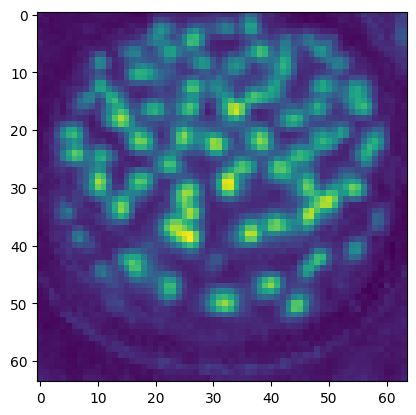

In [31]:
plt.imshow(word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu())

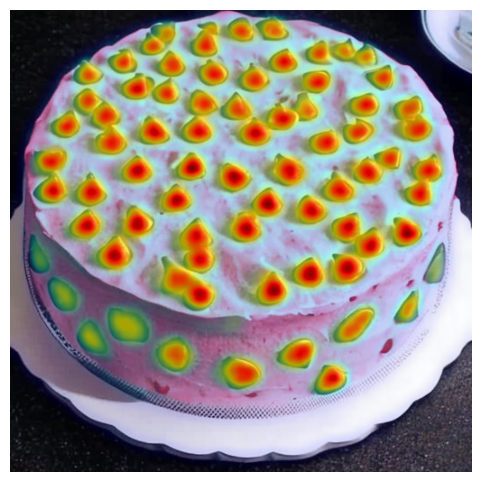

In [32]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([1], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

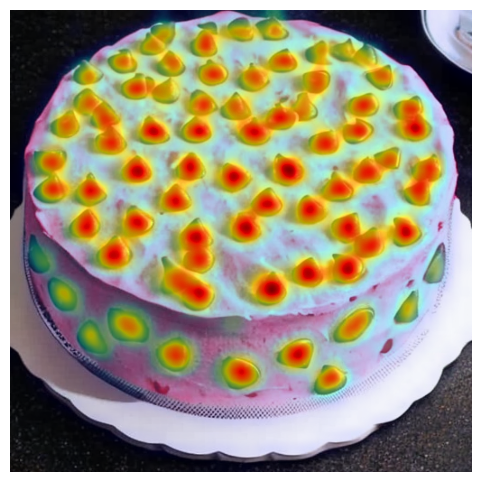

In [33]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([2], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

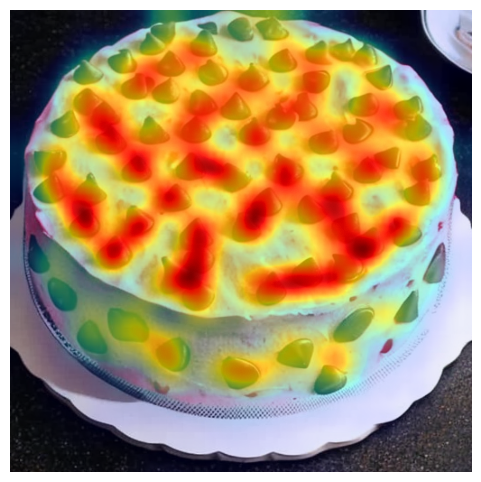

In [34]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([4], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

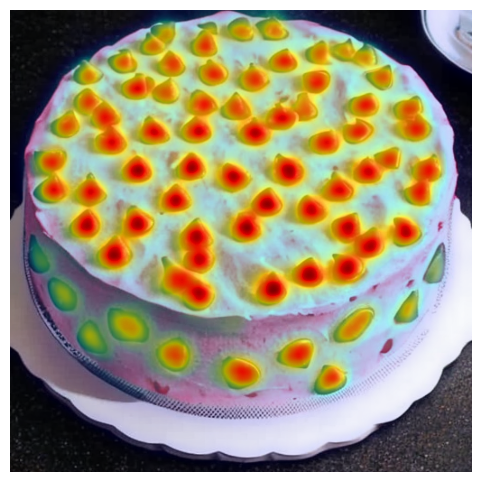

In [35]:
# # OOM Error the appending of heatmap runs gpu out of memory - Done not runs out of memory if all of these are not set to None
maps = torch.zeros((4096, 64, 64))
for factor in [1,2,4]:
  FHL_heat_map = image_all_heat_map.compute_global_heat_map([factor], None, None)
  maps += FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))] / (2 ** factor) if factor != 1 else FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))]
maps /= 3 
image_global_heat_map = daami2i.GlobalHeatMap(maps, 4096)

image_global_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

In [37]:
len(list(word_all_heat_map.all_heat_maps))

175

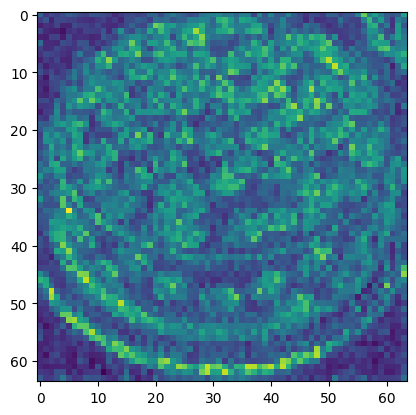

In [57]:
plt.imshow(word_all_heat_map.compute_global_heat_map(factors=[1], head_idx=None, layer_idx=None).compute_word_heat_map(word).heatmap.cpu())

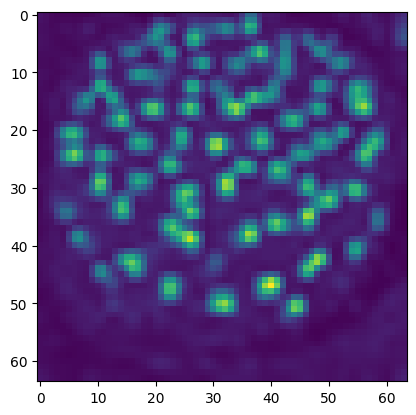

In [56]:
plt.imshow(word_all_heat_map.compute_global_heat_map(factors=[2], head_idx=None, layer_idx=None).compute_word_heat_map(word).heatmap.cpu())

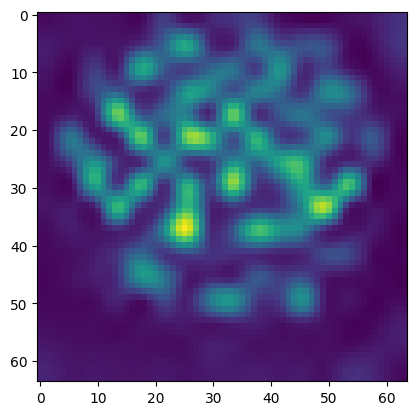

In [55]:
plt.imshow(word_all_heat_map.compute_global_heat_map(factors=[4], head_idx=None, layer_idx=None).compute_word_heat_map(word).heatmap.cpu())

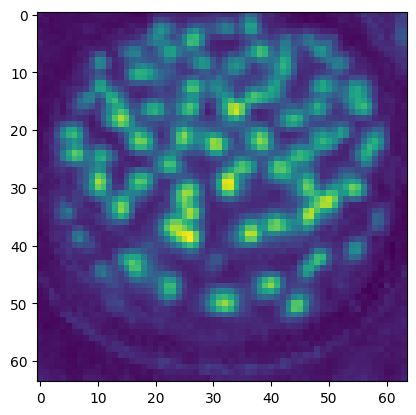

In [59]:
plt.imshow(word_all_heat_map.compute_global_heat_map(factors=None, head_idx=None, layer_idx=None).compute_word_heat_map(word).heatmap.cpu())

In [60]:
# # OOM Error the appending of heatmap runs gpu out of memory - Done not runs out of memory if all of these are not set to None
word = cleaned_prompt[2]

maps = torch.zeros((64, 64))
for (factor, layer, head), heat_map in word_all_heat_map.all_heat_maps:

  image_FHL_heat_map = image_all_heat_map.compute_global_heat_map([factor], head, layer)
  word_FHL_heat_map = word_all_heat_map.compute_global_heat_map(factors=[factor], head_idx=head, layer_idx=layer)
  
  guided_FHL_heat_map = image_FHL_heat_map.compute_guided_heat_map(
      word_FHL_heat_map.compute_word_heat_map(word).heatmap.cpu()
      )
  maps += guided_FHL_heat_map.heatmap

maps /= len(list(word_all_heat_map.all_heat_maps))

word_image_global_heat_map = daami2i.PixelHeatMap(maps)

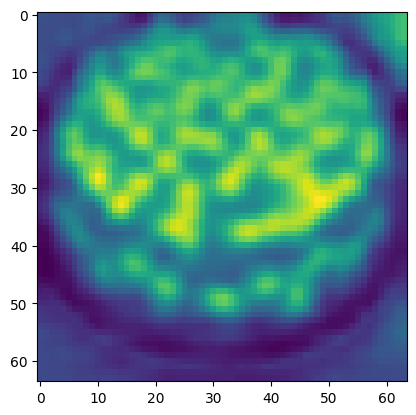

In [61]:
plt.imshow(word_image_global_heat_map.heatmap)

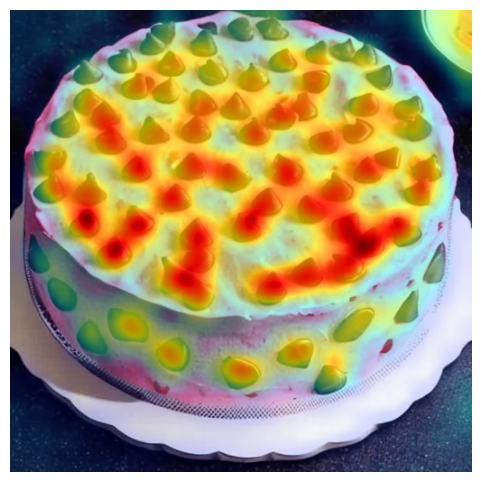

In [62]:
word_image_global_heat_map.plot_overlay(output_image, (6,6))

In [65]:
# # OOM Error the appending of heatmap runs gpu out of memory - Done not runs out of memory if all of these are not set to None
word = cleaned_prompt[2]

maps = torch.zeros((64, 64))
for factor in [1, 2, 4]:

  image_FHL_heat_map = image_all_heat_map.compute_global_heat_map([factor])
  word_FHL_heat_map = word_all_heat_map.compute_global_heat_map(factors=[factor])
  
  guided_FHL_heat_map = image_FHL_heat_map.compute_guided_heat_map(
      word_FHL_heat_map.compute_word_heat_map(word).heatmap.cpu()
      )
  maps += guided_FHL_heat_map.heatmap

maps /= 3

word_image_global_heat_map = daami2i.PixelHeatMap(maps)

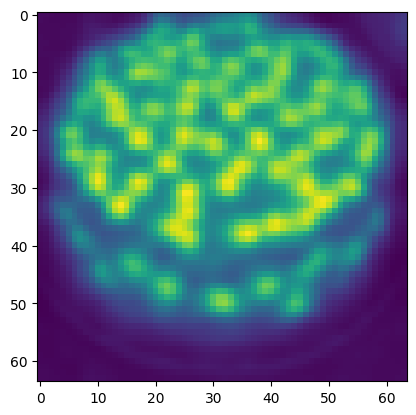

In [66]:
plt.imshow(word_image_global_heat_map.heatmap)

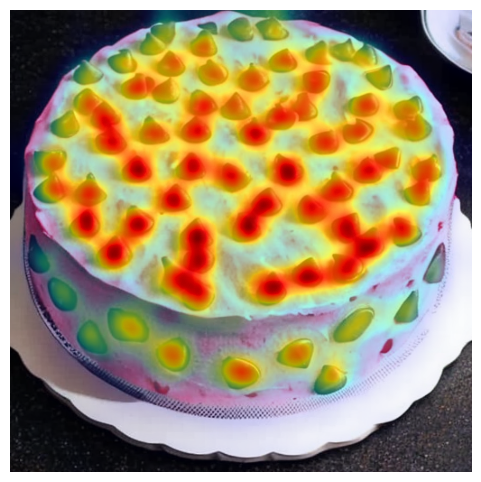

In [67]:
word_image_global_heat_map.plot_overlay(output_image, (6,6))

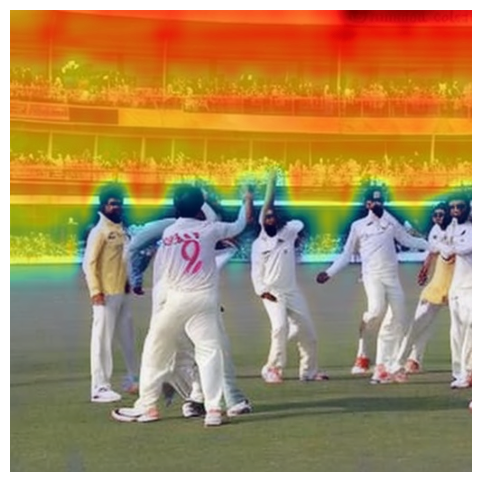

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([2], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

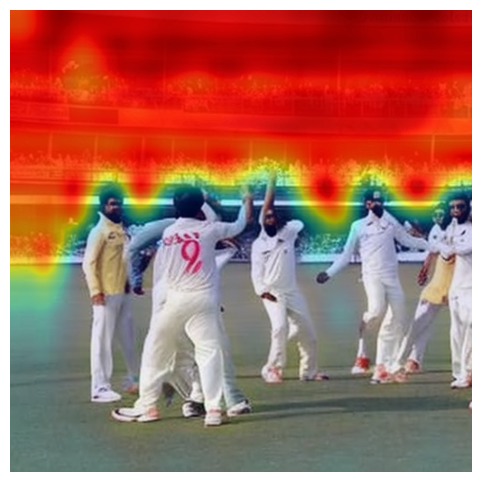

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([4], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

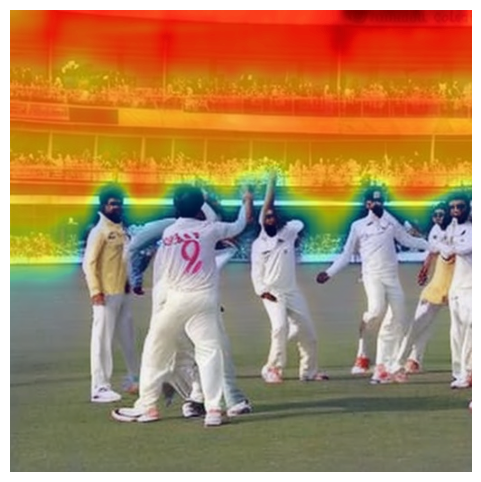

In [ ]:
# # OOM Error the appending of heatmap runs gpu out of memory - Done not runs out of memory if all of these are not set to None
maps = torch.zeros((4096, 64, 64))
for factor in [1,2,4]:
  FHL_heat_map = image_all_heat_map.compute_global_heat_map([factor], None, None)
  maps += FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))] / (2 ** factor) if factor != 1 else FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))]
maps /= 3 
image_global_heat_map = daami2i.GlobalHeatMap(maps, 4096)

image_global_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[2]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

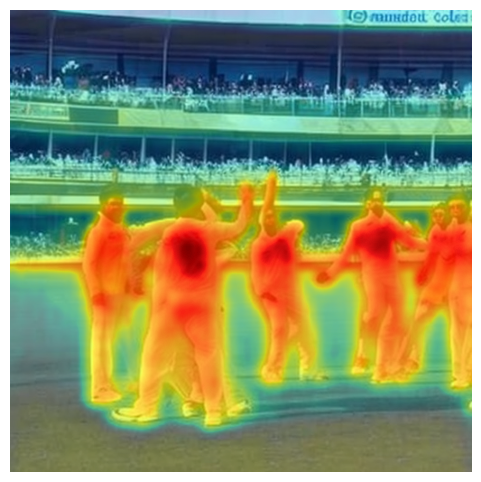

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([1], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[3]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

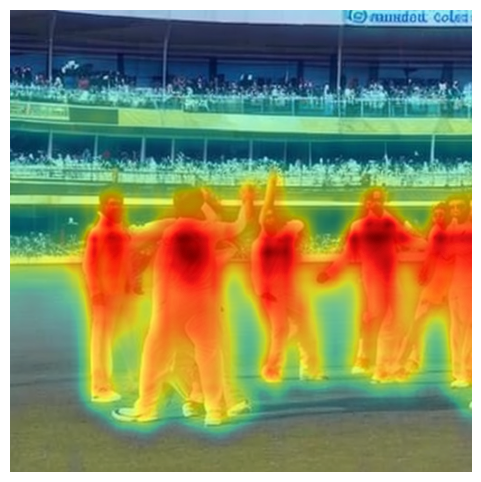

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([2], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[3]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

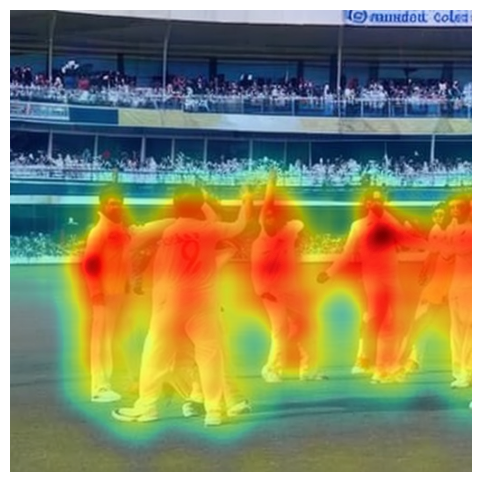

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([4], None, None)
FHL_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[3]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

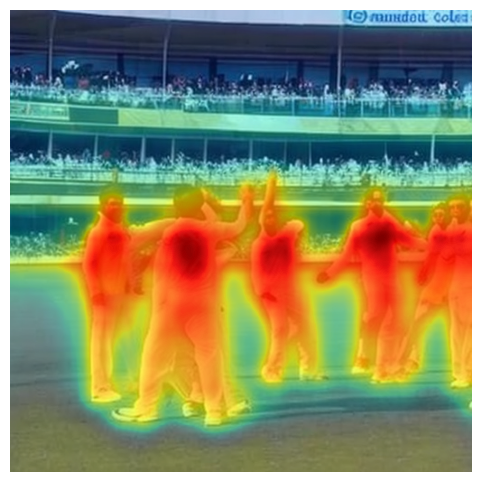

In [ ]:
# # OOM Error the appending of heatmap runs gpu out of memory - Done not runs out of memory if all of these are not set to None
maps = torch.zeros((4096, 64, 64))
for factor in [1,2,4]:
  FHL_heat_map = image_all_heat_map.compute_global_heat_map([factor], None, None)
  maps += FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))] / (2 ** factor) if factor != 1 else FHL_heat_map.heat_maps[FHL_heat_map.scale_correction(list(range(4096)))]
maps /= 3 
image_global_heat_map = daami2i.GlobalHeatMap(maps, 4096)

image_global_heat_map.compute_guided_heat_map(
    word_global_heat_map.compute_word_heat_map(cleaned_prompt[3]).heatmap.cpu()
    ).plot_overlay(output_image, (6,6))

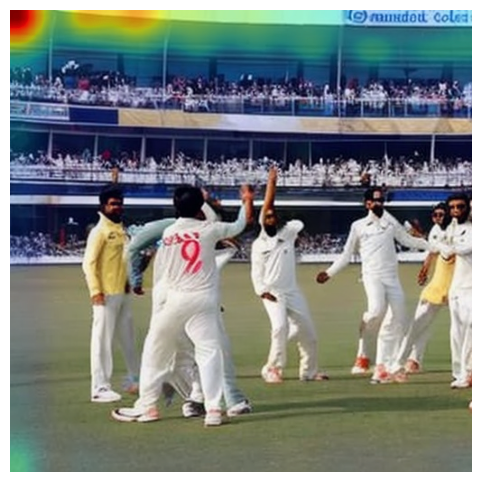

In [ ]:
FHL_heat_map.compute_pixel_heat_map(1).plot_overlay(output_image, (6,6))

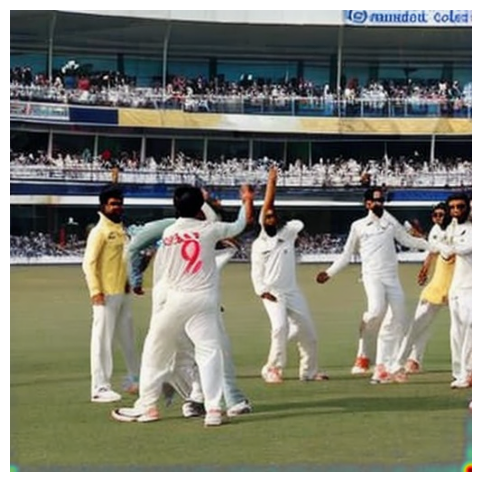

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([1], None, None)
FHL_heat_map.compute_pixel_heat_map(4095).plot_overlay(output_image, (6,6))

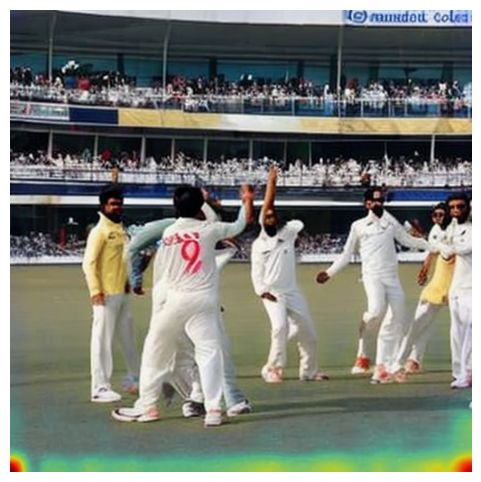

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([2], None, None)
FHL_heat_map.compute_pixel_heat_map(4095).plot_overlay(output_image, (6,6))

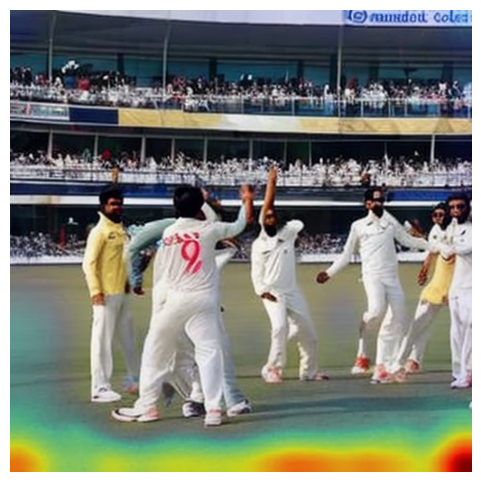

In [ ]:
FHL_heat_map = image_all_heat_map.compute_global_heat_map([4], None, None)
FHL_heat_map.compute_pixel_heat_map(4095).plot_overlay(output_image, (6,6))

### Visualize Heatmaps

In [ ]:
# annotations = list()
object_annotator = titan.ObjectAnnotator()

In [ ]:
def plot_all(word):
  fig, ax = plt.subplots(2, 2, figsize=(12,12))
  fig.suptitle(f'Attention Heatmaps for {word}', fontsize=16)
  word_heatmap = word_global_heat_map.compute_word_heat_map(word)
  word_annotation = [ann['segmentation'] for ann in object_annotator.wordheatmap_to_annotations(word_heatmap.expand_as(output_image).numpy())]
  # Text2Image DAAM Heatmap
  ax[0,0].imshow(word_heatmap.expand_as(output_image).numpy())
  ax[0,0].axis('off')
  ax[0,0].set_title('DAAM')
  # Contour Image2Image Heatmap (DAAMI2I NW)
  ax[0,1].imshow(image_global_heat_map.compute_segmentation_heat_map(word_annotation, output_image.size[0], output_image.size[1]).expand_as(output_image).numpy())
  ax[0,1].axis('off')
  ax[0,1].set_title('DAAMI2I NW')
  # Guided Image2Image Heatmap (DAAMI2I W)
  ax[1,0].imshow(image_global_heat_map.compute_guided_heat_map(word_heatmap.heatmap).expand_as(output_image).numpy())
  ax[1,0].axis('off')
  ax[1,0].set_title('DAAMI2I W')
  # Contour + Guidance within Contour Image2Image Heatmap (DAAMI2I NW+W)
  ax[1,1].imshow(image_global_heat_map.compute_segmentation_heat_map(word_annotation, output_image.size[0], output_image.size[1], word_heatmap.heatmap).expand_as(output_image).numpy())
  ax[1,1].axis('off')
  ax[1,1].set_title('DAAMI2I NW+W')

In [ ]:
plot_all(cleaned_prompt[0])

In [ ]:
plot_all(cleaned_prompt[1])

In [ ]:
plot_all(cleaned_prompt[2])

In [ ]:
plot_all(cleaned_prompt[3])

In [ ]:
plot_all(cleaned_prompt[4])

### Object Detections

In [ ]:
def annotate_word(image, word_annotation):
  object_annotator.show_annotations(np.asarray(image), word_annotation, figsize=(10,10))
  plt.title(f'Object Detection for {word}')

In [ ]:
# DAAM base
word_heatmap = word_global_heat_map.compute_word_heat_map(cleaned_prompt[0])
word_annotation = object_annotator.wordheatmap_to_annotations(word_heatmap.expand_as(output_image).numpy())
annotate_word(output_image, word_annotation)

In [ ]:
# DAAMI2I NW
word_heatmap = word_global_heat_map.compute_word_heat_map(cleaned_prompt[0])
word_annotation = object_annotator.wordheatmap_to_annotations(
    image_global_heat_map.compute_segmentation_heat_map(word_annotation, output_image.size[0], output_image.size[1]).expand_as(output_image).numpy()
)
annotate_word(output_image, word_annotation)

In [ ]:
# DAAMI2I W
word_heatmap = word_global_heat_map.compute_word_heat_map(cleaned_prompt[0])
word_annotation = object_annotator.wordheatmap_to_annotations(
    image_global_heat_map.compute_guided_heat_map(word_heatmap.heatmap).expand_as(output_image).numpy()
)
annotate_word(output_image, word_annotation)

In [ ]:
# DAAMI2I NW+W
word_heatmap = word_global_heat_map.compute_word_heat_map(cleaned_prompt[0])
word_annotation = object_annotator.wordheatmap_to_annotations(
    image_global_heat_map.compute_segmentation_heat_map(word_annotation, output_image.size[0], output_image.size[1], word_heatmap.heatmap).expand_as(output_image).numpy()
)
annotate_word(output_image, word_annotation)